In [1]:
from prody import *
import numpy as np
from sklearn.cluster import SpectralClustering, ward_tree
from sklearnex import patch_sklearn
from scipy.sparse.linalg import eigsh
import scipy
import os
import wget
import shutil
import gzip
import numba as nb
import matplotlib.pyplot as plt

C:\Users\colin\Miniconda3\envs\idp\lib\site-packages\numba_dppy\config.py:55: UserWarning: Please install dpctl 0.8.* or higher.
  warnings.warn(msg, UserWarning)
In C:\Users\colin\Miniconda3\envs\idp\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\colin\Miniconda3\envs\idp\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\colin\Miniconda3\envs\idp\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\colin\Miniconda3\envs\idp\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The va

In [2]:
pdb = '1a34'
n_modes = 60
filename = pdb + '.pdb'

if not os.path.exists(filename):
    vdb_url = 'https://files.rcsb.org/download/' + pdb + '.pdb.gz'
    print(vdb_url)
    vdb_filename = wget.download(vdb_url)
    with gzip.open(vdb_filename, 'rb') as f_in:
        with open(filename, 'wb') as f_out:
           shutil.copyfileobj(f_in, f_out)

In [3]:
capsid = parsePDB(filename, biomol=True)

calphas = capsid.select('ca').copy()
n = calphas.getCoords().shape[0]
print(n)
cutoff = 10

@> 3428 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> Biomolecular transformations were applied to the coordinate data.


8820


In [4]:
print(np.mean(calphas.getCoords(),axis=0))

[-1.31313453e-15  5.44749431e-15  2.29073500e-15]


In [5]:
#calphas_test = np.delete(calphas.getCoords(), list(range(0, calphas.getCoords().shape[0], 3)), axis=0)
#calphas_test = np.delete(calphas_test, list(range(0, calphas_test.shape[0], 3)), axis=0)

In [6]:
#print(calphas_test.shape)

C:\Users\colin\Miniconda3\envs\idp\lib\site-packages\prody\proteins\functions.py:265: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  show = Axes3D(cf)


<Axes3D:xlabel='x', ylabel='y'>

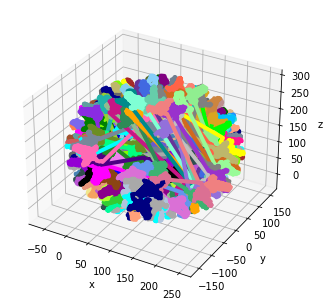

In [4]:
showProtein(calphas)

In [4]:
type = 'anm'
if type == 'anm':
    anm = ANM(pdb + '_full')
    anm.buildHessian(calphas, cutoff=cutoff, kdtree=True, sparse=True)
    #print(calphas.shape[0])
    evals, evecs = eigsh(anm.getHessian(), k=n_modes, sigma=1E-5, which='LA')
    anm._eigvals = evals
    anm._n_modes = len(evals)
    anm._eigvecs = evecs
    anm._vars = 1/evals
    anm._array = evecs
    model = anm
elif type == 'gnm':
    gnm = GNM(pdb + '_full')
    gnm.buildKirchhoff(calphas, cutoff=cutoff, kdtree=True, sparse=True)
    print(calphas.getCoords().shape[0])
    evals, evecs = eigsh(gnm.getKirchhoff(), k=n_modes, sigma=1E-5, which='LA')
    gnm._eigvals = evals
    gnm._n_modes = len(evals)
    gnm._eigvecs = evecs
    gnm._vars = 1/evals
    gnm._array = evecs
    model = gnm

@> Using KDTree for building the Hessian.
@> Hessian was built in 55.99s.


In [5]:
writeNMD('1a34_anm_modes.nmd', model, calphas)

'1a34_anm_modes.nmd'

In [6]:
pathVMD()

'C:/Program Files/VMD/vmd.exe'

In [9]:
evals_unique, eigval_pattern = np.unique(np.around(evals, decimals=2), return_counts=True)

In [10]:
print(evals)
print(eigval_pattern)

[0.06903929 0.06903929 0.06903929 0.20496646 0.20496646 0.20496646
 0.20496646 0.20496646 0.39496813 0.39496813 0.39496813 0.39496813
 0.41484705 0.41484705 0.41484705 0.64373644 0.64373644 0.64373644
 0.64373644 0.6635993  0.6635993  0.6635993  0.6635993  0.6635993
 0.86830134 0.86830134 0.86830134 0.93085645 0.93085645 0.93085645
 1.02543652 1.02543652 1.02543652 1.02543652 1.02543652 1.18140838
 1.18140838 1.18140838 1.21547609 1.21547609 1.21547609 1.21547609
 1.44394544 1.48044404 1.48044404 1.48044404 1.48044404 1.48044404
 1.582879   1.582879   1.582879   1.582879   1.67586389 1.67586389
 1.67586389 1.67586389 1.67586389 1.70359665 1.70359665 1.70359665]
[3 5 4 3 4 5 3 3 5 3 4 1 5 4 5 3]


In [11]:
evecs_unique, evecs_pattern = np.unique(np.round(evecs[0],decimals=5), return_counts=True)
print(evecs.shape)
print(evecs_pattern)

(8820, 60)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [12]:
evecs_unique, evecs_pattern = np.unique(np.round(evecs,decimals=6), axis = 1, return_counts=True)
print(evecs_pattern)
print(evecs_unique)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[-0.0308   -0.026197 -0.024476 ...  0.020482  0.022947  0.033444]
 [-0.028705 -0.023997 -0.023785 ...  0.01875   0.020687  0.032355]
 [-0.025695 -0.022113 -0.022559 ...  0.015725  0.019689  0.030591]
 ...
 [ 0.003185 -0.009303 -0.008519 ... -0.01444   0.006078 -0.00164 ]
 [ 0.00457  -0.011443 -0.007784 ... -0.014037  0.003305 -0.002579]
 [ 0.00623  -0.010763 -0.006248 ... -0.013506  0.001845 -0.002916]]


In [13]:
def calcDistFlucts1(modes, n_cpu=1, norm=True):
    """Returns the matrix of distance fluctuations (i.e. an NxN matrix
    where N is the number of residues, of MSFs in the inter-residue distances)
    computed from the cross-correlation matrix (see Eq. 12.E.1 in [IB18]_). 
    The arguments are the same as in :meth:`.calcCrossCorr`.

    .. [IB18] Dill K, Jernigan RL, Bahar I. Protein Actions: Principles and
       Modeling. *Garland Science* **2017**. """

    cc = calcCrossCorr(modes, n_cpu=n_cpu, norm=norm)
    print(cc.shape)
    cc_diag = np.diag(cc).reshape(-1,1)
    print(cc_diag.shape)
    distFluct = cc_diag.T + cc_diag -2.*cc
    return distFluct

In [26]:
print(evecs[:,0].shape)

(8820,)


In [14]:
def distSum(evecs, evals, i, j):
    r = 0
    for k in range(len(evals)):
        r += 1/evals[k]*evecs[i,k]*evecs[j,k]
    return 3*r

In [28]:
from scipy import sparse
def calcFluctsGNM(evals, evecs, neighbors):
    n = evecs.shape[0]
    print(n)
    flucts = sparse.lil_matrix((n,n), dtype = np.float64)
    for ind in neighbors:
        i = ind[0]
        j = ind[1]
        r = distSum(evecs, evals, i, j)
        flucts[i,j] = r
    
    return flucts.tocsr()

In [4]:
nearestNeighs = np.full((n, n), True, dtype=bool)
np.fill_diagonal(nearestNeighs, False)
dist = buildDistMatrix(calphas)
nearestNeighs &= (dist <= cutoff)
print(np.argwhere(nearestNeighs))
neighbors = np.argwhere(nearestNeighs)
print(neighbors.shape)

[[   0    1]
 [   0    2]
 [   0    3]
 ...
 [8819 8816]
 [8819 8817]
 [8819 8818]]
(177720, 2)


In [32]:
sparseFlucts = calcFluctsGNM(evals, evecs, neighbors)


8820
77753790


In [37]:
# distFlucts = calcDistFlucts(model, norm=False)
# n = distFlucts.shape[0]
# print(n)
# nearestNeighs = np.full((n, n), True, dtype=bool)
# np.fill_diagonal(nearestNeighs, False)
# dist = buildDistMatrix(calphas)
# nearestNeighs &= (dist <= cutoff)
nnDistFlucts = sparseFlucts[nearestNeighs]
print(nnDistFlucts)
sigma = 1/(2*np.mean(nnDistFlucts)**2)
sims = sparseFlucts.copy()
sims.data = np.exp(-sigma*sparseFlucts.data**2)
#from scipy import sparse
#sims = sparse.csr_matrix(sims)

[[0.05252422 0.0507034  0.05012013 ... 0.03783372 0.03880697 0.03902394]]


In [38]:
from sklearnex import patch_sklearn
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_samples, silhouette_score
patch_sklearn()

def spectral_raw(sims, calphas, n_range):
    quality = []
    labels = []
    cluster_types = []
    n_c = calphas.getCoords().shape[0]
    for n_clusters in n_range:
        print(n_clusters)
        clust = SpectralClustering(n_clusters = n_clusters, n_init=500, affinity='precomputed').fit(sims)
        label = clust.labels_
        labels.append(label)
        __, counts = np.unique(label, return_counts=True)
        cluster_types.append(counts)
    return quality, labels, cluster_types




Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [ ]:
n_range = [12, 20, 32] 
quality, labels, cluster_types = spectral_raw(sims, calphas, n_range)

12
20


In [19]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
scores = []
devs = []
for n in range(len(n_range)):
    domains = labels[n]
    __, counts = np.unique(domains, return_counts = True)
    devs.append(np.std(counts))
    testScore = silhouette_score(distFlucts, domains, metric='precomputed')
    scores.append(testScore)
    print(len(np.unique(domains)))
    nc = str(n_range[n])
    writePDB(pdb + '_' + nc + '_domains.pdb',calphas,beta=domains)



12
20
32


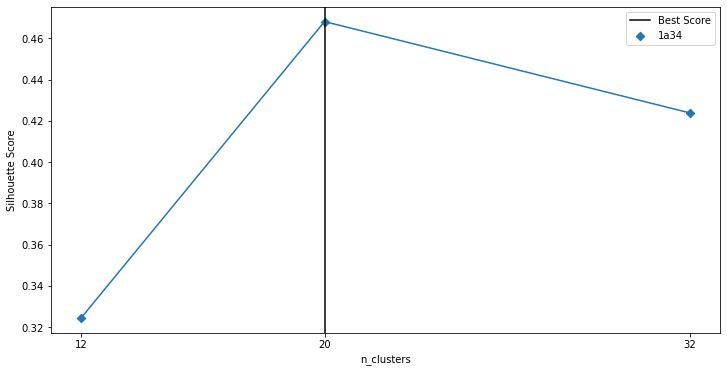

In [20]:
# cluster_similarity = [np.var(t)/(np.mean(t)) for t in cluster_types]
fig, ax = plt.subplots(1,1, figsize=(12,6))
ax.scatter(n_range, scores, marker = 'D', label=pdb)
ax.plot(n_range, scores)
ax.axvline(x = n_range[np.argmax(scores)], label = 'Best Score', color = 'black')
ax.set_xticks(n_range)
ax.set_xlabel('n_clusters')
ax.set_ylabel('Silhouette Score')
ax.legend()
# ax[1].plot([32,60,90], cluster_types)
# ax[1].set_ylabel('Unique Clusters')
# fig.tight_layout()
plt.show()

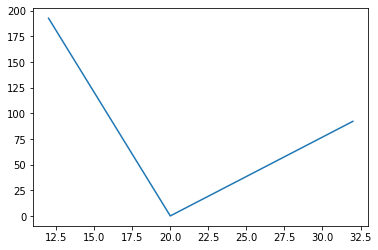

In [21]:
plt.plot(n_range, devs)

In [22]:
import nglview
file = '1a34_20_domains.pdb'

view = nglview.show_file(file)  # load "3pqr" from RCSB PDB and display viewer widget
view.update_representation(color_scheme='bfactor')
view.background = 'black'
view

ModuleNotFoundError: No module named 'nglview'

In [21]:
from numba import prange
@nb.njit(nb.float64[:,:](nb.float64,nb.int32, nb.float64[:]), fastmath=True, parallel=True)
def calcArr(eigval, n_atoms, evec):
    arr = np.empty((n_atoms,n_atoms), dtype=np.float64)
    for i in prange(n_atoms):
        for j in prange(n_atoms):
            vec1 = 1/eigval * evec[3*i:3*i+3]
            vec2 = 1/eigval * evec[3*j:3*j+3]
            arr[i,j] = np.dot(vec1,vec2)
    return arr


@nb.njit(nb.float64[:,:](nb.float64[:], nb.float64[:,:]), fastmath=True, parallel=True)
def calcHessInvTrace(eigvals, eigvecs):
    n_modes = eigvals.shape[0]
    print(n_modes)
    n_atoms = int(eigvecs.shape[0]/3)
    print(n_atoms)
    hessInvTrace = np.zeros((n_atoms, n_atoms), dtype = np.float64)
    for k in prange(n_modes):
        print(k)
        arr = calcArr(eigvals[k], n_atoms, eigvecs[:,k])
        hessInvTrace += arr
    return hessInvTrace

#def calcFlucts(hessInv):
    

In [22]:
hessInv = calcHessInvTrace(model.getEigvals(), model.getEigvecs())

5
8820
3
1
4
0
2
